# Prelims

In [1]:
import h5py
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from numpy.random import seed
import random
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
seedvalue=1

seed(seedvalue)
tf.compat.v1.set_random_seed(seedvalue)
tf.random.set_seed(seedvalue)
random.seed(seedvalue)
tf.keras.utils.set_random_seed(
    seedvalue
)
os.environ['PYTHONHASHSEED'] = '0'
os.environ["TF_DETERMINISTIC_OPS"] = str(seedvalue)


# Axial Plane

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


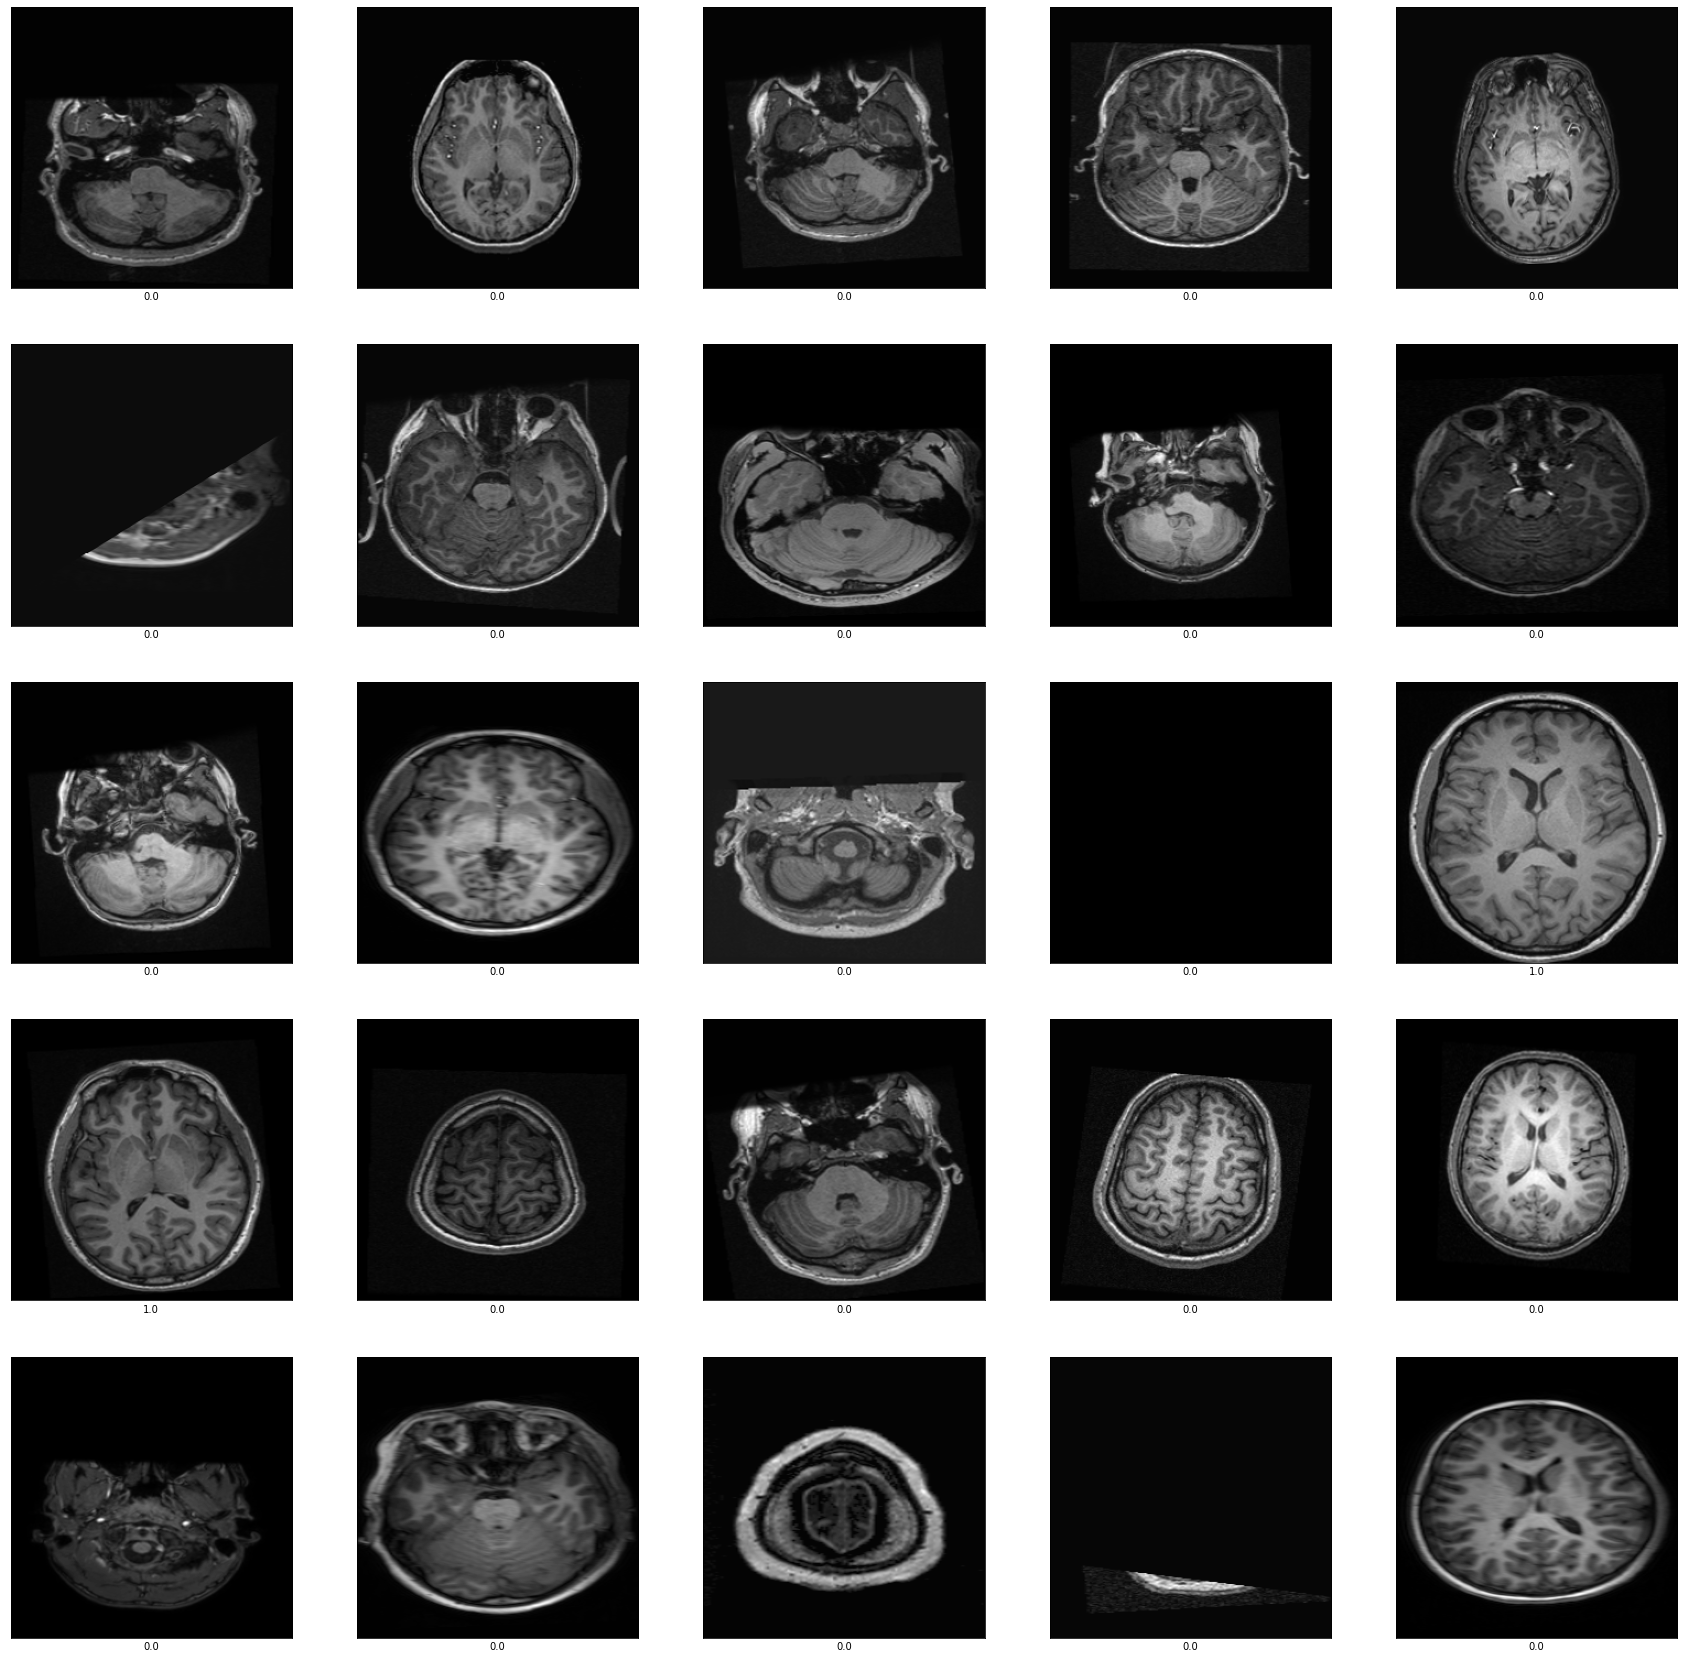

In [ ]:
# AXIAL
# mount drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


# load data for Axial Plane
data=h5py.File('/content/drive/MyDrive/abide/AbideTrainV1.h5','r')
train_images=data.get("image")
train_labels=data.get("label")
#validation data
data=h5py.File('/content/drive/MyDrive/abide/AbideValidV1.h5','r')
test_images=data.get("image")
test_labels=data.get("label")
# test data
data=h5py.File('/content/drive/MyDrive/abide/AbideTestV1.h5','r')
test_images2=data.get("image")
test_labels2=data.get("label")


## Visualaize the data
# verify data
ids=np.random.randint(len(train_images), size=(25))
plt.figure(figsize=(30,30))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=train_images[ids[i]]
    plt.imshow(im,cmap='gray')
    plt.xlabel(train_labels[ids[i]])
plt.show()


# Convert data in usable form for network
train_images= np.asarray(train_images)
train_labels= np.asarray(train_labels)
test_images= np.asarray(test_images)
test_labels= np.asarray(test_labels)
test_images2= np.asarray(test_images2)
test_labels2= np.asarray(test_labels2)


train_images=np.expand_dims(train_images,axis=3)


[[509  71]
 [  2  78]]
0.9827801724137931
Accuracy = 0.8893939393939394
Sensitivity= 0.975
Specificity= 0.8775862068965518
NPV= 0.9960861056751468
PPV= 0.5234899328859061
AUC= 0.9827801724137931


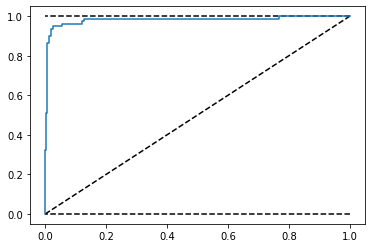

In [ ]:
# Train data
model = keras.models.load_model('AxialAbideCnn300epochsOnce.h5')
modelFC = keras.models.load_model('BestFCmodelForAxialAbide.h5')

batchsize=32
output2=[]
labels2=[]

for batchno in range(int(len(train_images)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=train_images[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=train_labels[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')
print(auc_rf)


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))


trainAxial_images=train_images
trainAxial_labels=train_labels
trainAxial_DCNNout=output2
trainAxial_DCNNoutlabels=labels2
del train_images
del train_labels

[[153  40]
 [  3  24]]
0.8407215505661101
Accuracy = 0.8045454545454546
Sensitivity= 0.8888888888888888
Specificity= 0.7927461139896373
NPV= 0.9807692307692307
PPV= 0.375
AUC= 0.8407215505661101


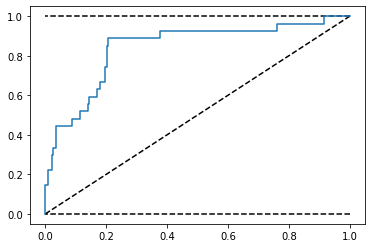

In [ ]:
# Validation data
model = keras.models.load_model('AxialAbideCnn300epochsOnce.h5')
modelFC = keras.models.load_model('BestFCmodelForAxialAbide.h5')

batchsize=32
output2=[]
labels2=[]

for batchno in range(int(len(test_images)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=test_images[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=test_labels[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')
print(auc_rf)


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))

validAxial_images=test_images
validAxial_labels=test_labels
validAxial_DCNNout=output2
validAxial_DCNNoutlabels=labels2

[[159  35]
 [  5  22]]
0.8680794196258113
Accuracy = 0.8190045248868778
Sensitivity= 0.8148148148148148
Specificity= 0.8195876288659794
NPV= 0.9695121951219512
PPV= 0.38596491228070173
AUC= 0.8680794196258113


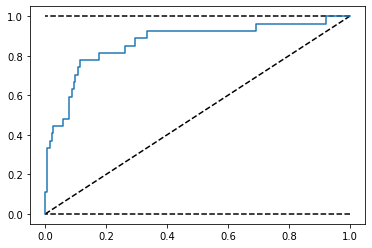

In [ ]:
# Test data
model = keras.models.load_model('AxialAbideCnn300epochsOnce.h5')
modelFC = keras.models.load_model('BestFCmodelForAxialAbide.h5')

output2=[]
labels2=[]

for batchno in range(int(len(test_images2)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=test_images2[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=test_labels2[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')
print(auc_rf)


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))

testAxial_images=test_images2
testAxial_labels=test_labels2
testAxial_DCNNout=output2
testAxial_DCNNoutlabels=labels2

# Test it on ADNI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[197 104]
 [  5   8]]
0.6966521850242781
Accuracy = 0.6528662420382165
Sensitivity= 0.6153846153846154
Specificity= 0.654485049833887
NPV= 0.9752475247524752
PPV= 0.07142857142857142
AUC= 0.6966521850242781


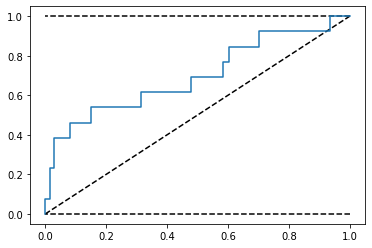

In [4]:
# Check it for ADNI test data
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

batchsize=32
# load data for Axial Plane
data=h5py.File('/content/drive/MyDrive/adni/axial/AbideTestAxial.h5','r')
test_images2=data.get("image")
test_labels2=data.get("label")

model = keras.models.load_model('AxialAbideCnn300epochsOnce.h5')
modelFC = keras.models.load_model('BestFCmodelForAxialAbide.h5')

output2=[]
labels2=[]

for batchno in range(int(len(test_images2)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=test_images2[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=test_labels2[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')
print(auc_rf)


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))

testAxial_images=test_images2
testAxial_labels=test_labels2
testAxial_DCNNout=output2
testAxial_DCNNoutlabels=labels2

In [ ]:
# Free up RAM
del testAxial_images
del testAxial_labels
del validAxial_images
del validAxial_labels
del trainAxial_images
del trainAxial_labels

# Coronal Plane

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


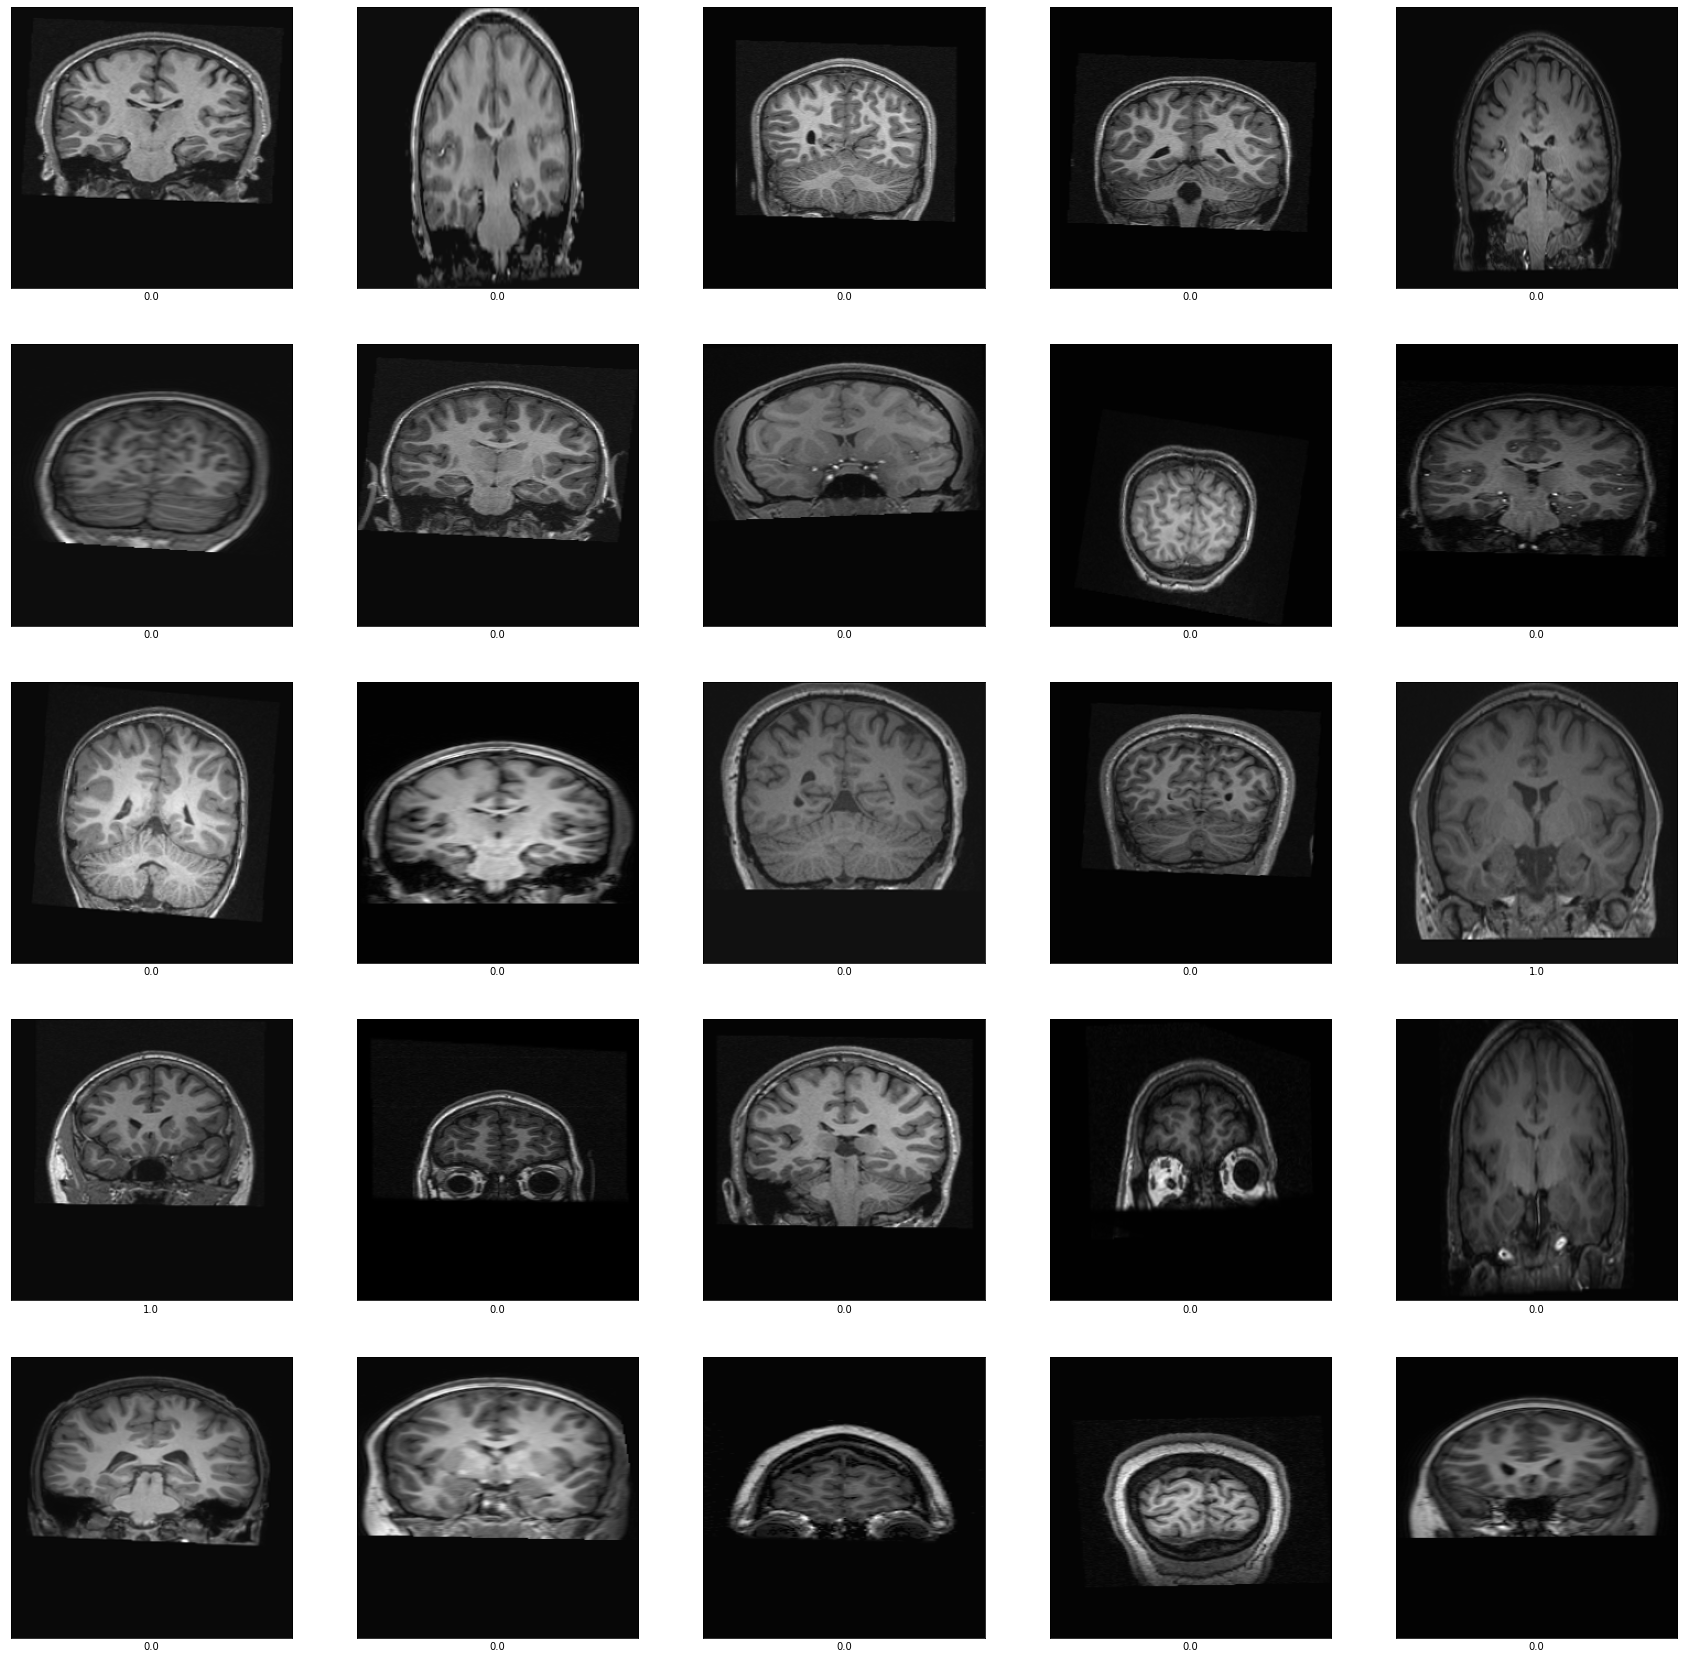

In [ ]:
# Coronal
# mount drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


# load data for Axial Plane
data=h5py.File('/content/drive/MyDrive/abideCoronal/AbideTrainV1.h5','r')
train_images=data.get("image")
train_labels=data.get("label")
#validation data
data=h5py.File('/content/drive/MyDrive/abideCoronal/AbideValidV1.h5','r')
test_images=data.get("image")
test_labels=data.get("label")
# test data
data=h5py.File('/content/drive/MyDrive/abideCoronal/AbideTestV1.h5','r')
test_images2=data.get("image")
test_labels2=data.get("label")


## Visualaize the data
# verify data
ids=np.random.randint(len(train_images), size=(25))
plt.figure(figsize=(30,30))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=train_images[ids[i]]
    plt.imshow(im,cmap='gray')
    plt.xlabel(train_labels[ids[i]])
plt.show()


# Convert data in usable form for network
train_images= np.asarray(train_images)
train_labels= np.asarray(train_labels)
test_images= np.asarray(test_images)
test_labels= np.asarray(test_labels)
test_images2= np.asarray(test_images2)
test_labels2= np.asarray(test_labels2)


train_images=np.expand_dims(train_images,axis=3)


[[551  29]
 [  0  80]]
0.9997198275862069
Accuracy = 0.956060606060606
Sensitivity= 1.0
Specificity= 0.95
NPV= 1.0
PPV= 0.7339449541284404
AUC= 0.9997198275862069


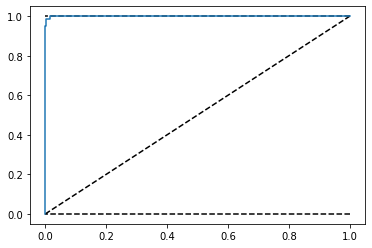

In [ ]:
# Train data

model = keras.models.load_model("CoronalAbideCnn300Once_Retraindense.h5")
modelFC = keras.models.load_model("FCmodelacc70TP21AUC73.h5")

output2=[]
labels2=[]
batchsize=32

for batchno in range(int(len(train_images)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=train_images[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=train_labels[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')
print(auc_rf)


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))



#trainCoronal_images=train_images
#trainCoronal_labels=train_labels
del train_images
del train_labels
trainCoronal_DCNNout=output2
trainCoronal_DCNNoutlabels=labels2

[[134  59]
 [  6  21]]
0.7311456534254462
Accuracy = 0.7045454545454546
Sensitivity= 0.7777777777777778
Specificity= 0.694300518134715
NPV= 0.9571428571428572
PPV= 0.2625
AUC= 0.7311456534254462


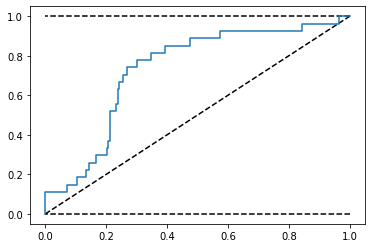

In [ ]:
# Valid data

model2 = keras.models.load_model("CoronalAbideCnn300Once_Retraindense.h5")
modelFC = keras.models.load_model("FCmodelacc70TP21AUC73.h5")

output2=[]
labels2=[]

for batchno in range(int(len(test_images)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=test_images[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=test_labels[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))

del test_images
del test_labels
validCoronal_DCNNout=output2
validCoronal_DCNNoutlabels=labels2

[[124  70]
 [  5  22]]
Accuracy = 0.6606334841628959
Sensitivity= 0.8148148148148148
Specificity= 0.6391752577319587
NPV= 0.9612403100775194
PPV= 0.2391304347826087
AUC= 0.7720504009163803


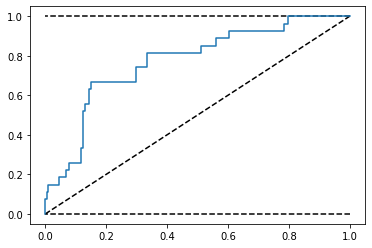

In [ ]:
# Test data

model2 = keras.models.load_model("CoronalAbideCnn300Once_Retraindense.h5")
modelFC = keras.models.load_model("FCmodelacc70TP21AUC73.h5")

output2=[]
labels2=[]

for batchno in range(int(len(test_images2)/32)):    
  # Iterate over the batches of the dataset.
  testbatch=test_images2[batchno*batchsize:(batchno+1)*batchsize]
  testlabel=test_labels2[(batchno*batchsize)]
  # Open a GradientTape to record the operations run
  # during the forward pass, which enables auto-differentiation.
  #testbatch=np.squeeze(testbatch,axis=3)
  #print(trainbatch.shape)
  logits = model.predict(testbatch)  # Logits for this minibatch
  logits=np.squeeze(logits,axis=1)
  output2.append(logits)
  labels2.append(testlabel)

prediction = modelFC.predict(np.asarray(output2))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.asarray(labels2), np.round(prediction))

print(matrix)

y_pred = modelFC.predict(np.asarray(output2))
fpr, tpr, thresholds_rf = roc_curve(labels2, y_pred)
auc_rf = auc(fpr, tpr)
plt.figure(1)
plt.plot([1, 0], [0, 0], 'k--')
plt.plot([1, 0], [1, 1], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})')


print('Accuracy =',str((matrix[0,0]+matrix[1,1])/sum(sum(matrix))))
print('Sensitivity=',str((matrix[1,1])/(matrix[1,0]+matrix[1,1])))
print('Specificity=',str((matrix[0,0])/(matrix[0,1]+matrix[0,0])))
print('NPV=',str((matrix[0,0])/(matrix[0,0]+matrix[1,0])))
print('PPV=',str((matrix[1,1])/(matrix[0,1]+matrix[1,1])))
print('AUC=',str(auc_rf))

del test_images2
del test_labels2
testCoronal_DCNNout=output2
testCoronal_DCNNoutlabels=labels2